<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="skyblue">University of Tehran</i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>
    </div>
</div>

<h1 style = "color:orange;" dir = "ltr"> <b>
    Introduction to Artificial Intelligence
</b> </h1>

<h1 style = "color:orange;" dir = "ltr"> <b>
    CA5 - Convolutional Neural Networks (CNNs)
</b> </h1>

<h1 style = "color:orange;" dir = "ltr"> <b>
    Mahdi Naieni - 810101536
</b> </h1>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Table of Contents
</b> </h1>

- [Introduction](#intro)  

    - [Project Summary and Objectives](#summary)

    - [Understanding and Exploring the Dataset](#dataset)

- [Part 0: Preprocessing of dataset](#part0)

  - [Questions](#questions0)

- [Part I: Feature Vectors](#part1)

  - [Questions](#questions1)

- [Part II: Classification using a CNN network](#part2)

  - [Questions](#questions2)

- [Part III: Effect of context window size on model learning](#part3)

  - [Questions](#questions3)

- [Part IV: Effect of regularization methods in the learning process](#part4)

- [References](#references)  

<a id='intro'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Introduction
</b> </h1>

<a id='summary'></a>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Project Summary and Objectives:
</b> </h1>

In this comprehensive exercise, we delve into the realm of text data processing. Our journey begins with preprocessing textual data, setting the stage for subsequent steps. Following this, we explore the utilization of the vec2word model, crucial for preparing our images for neural network input. The second phase focuses on constructing a convolutional neural network (CNN) utilizing the PyTorch library, aimed at classifying images effectively. As we progress, we investigate the influence of text window size on the learning capabilities of the network. Finally, we delve into the role of regularization techniques during the training process, analyzing their impact on enhancing educational outcomes.

In [3]:
!pip install emoji

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
import emoji
import gensim.downloader as api
import torch
import warnings
from torch.utils.data import Dataset, DataLoader
import os
import gensim
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn import metrics

In [5]:
LEARNING_RATE = 4e-4
WEIGHT_DECAY = 1e-2
BATCH_SIZE = 64
EPOCHS = 25

SEQUENCE_LEN = 64
CNN_FILTERS = 64

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id='dataset'></a>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Understanding and Exploring the Dataset:
</b> </h1>

In this exercise, we utilize a specialized text dataset designed to identify expressions of suicidal thoughts within social media platforms, specifically Twitter. This dataset, affectionately referred to as "data-suicidal-twitter," comprises a curated selection of tweets, categorized based on their content regarding suicidal ideation. Each entry in the dataset is presented as textual data, allowing for detailed analysis. Furthermore, each tweet is assigned a label indicating its intent: a value of 1 denotes potential suicidal thoughts, whereas a value of 0 signifies no such indications.

In [9]:
df = pd.read_csv("/content/drive/MyDrive/twitter-suicidal-data.csv")
df.tail(10).style.background_gradient(cmap='Reds')

,tweet,intention
9109,the loneliest moment in someone s life is when they are watching their whole world fall apart and all they can do is stare blankly,1
9110,you re afraid to tell people how you feel because it will destroy them so you bury it deep inside yourself where it destroys you,1
9111,i hate it when people tell me to just be happy so you think i chose to just be depressed,1
9112,fake friends are like shadows they follow you in the sun but leave you in the dark,0
9113,most girls my age have a pretty face i just have scars,1
9114,have you ever laid on your bed at night and cried because you re not good enough counted all your flaws and felt worse about yourself and just felt to ugly and alone,1
9115,the fault the blame the pain s still there i m here alone inside of this broken home broken home,1
9116,stop asking me to trust you when i m still coughing up the water from the last time you let me drown,1
9117,i never know how to handle sadness crying makes me feel stupid,1
9118,when cancer takes a life we blame cancer depression is a disease don t blame the victim for losing the fight,1


In [10]:
print(df.shape, "\n")
df.info()

(9119, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9119 non-null   object
 1   intention  9119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.6+ KB


In [11]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': missing_percentage})
missing_data_df

,Missing Values,Percentage Missing
tweet,0,0.0
intention,0,0.0


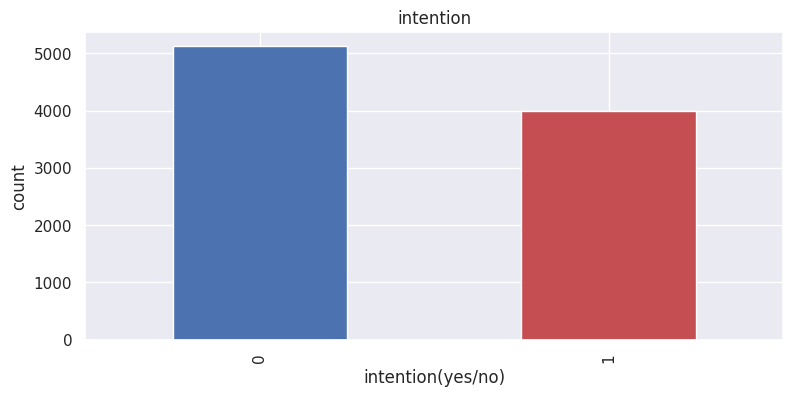

In [12]:
sns.set_theme()
intention_values =  df['intention'].value_counts()
intention_values.plot(kind='bar', figsize=(9, 4), color= ["b", "r"])
plt.title('intention')
plt.xlabel('intention(yes/no)')
plt.ylabel('count')
plt.show()

<a id='part0'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Part 0: Preprocessing of dataset
</b> </h1>

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
# Initialize stop words and lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
if 'no' in stop_words:
  stop_words.remove('no')
if 'not' in stop_words:
  stop_words.remove('not')

def convert_emoji_to_text(text):
    return emoji.demojize(text, delimiters=(" ", " "))

def nltk_pos_tagger(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wn.ADJ, "N": wn.NOUN, "V": wn.VERB, "R": wn.ADV}
    return tag_dict.get(tag, wn.NOUN)

def preprocess_data(tweet: str):
    # Convert text to lowercase
    tweet = tweet.lower()

    # Removing punctuation marks, but keeping hashtags (#)
    tweet = re.sub(r'[^\w\s#@]', '', tweet)
    tweet = tweet.replace('\n', ' ')

    # Delete numbers
    tweet = re.sub(r'\d+', '', tweet)

    # Deleting links
    tweet = re.sub(r'http\S+|www.\S+', '', tweet)

    # Deleting links
    tweet = re.sub(r'http\S+|www.\S+|https\S+', '', tweet)

    # Removing references to other social network users
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove emojis and replace them with space
    tweet = convert_emoji_to_text(tweet)

    # Unification of whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    # Tokenizing the tweet
    tokens = nltk.word_tokenize(tweet)

    # Remove non-word terms (keeping only words)
    tokens = [token for token in tokens if token.isalpha()]

    # Rooting tokens (lemmatizing)
    tokens = [lemmatizer.lemmatize(token, nltk_pos_tagger(token)) for token in tokens]

    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

In [15]:
df['tokens_test'] = df['tweet'].apply(preprocess_data)
df['token_count'] = df['tokens_test'].apply(len)
df.tail(10).style.background_gradient(cmap='Reds')

,tweet,intention,tokens_test,token_count
9109,the loneliest moment in someone s life is when they are watching their whole world fall apart and all they can do is stare blankly,1,"['lonely', 'moment', 'someone', 'life', 'watch', 'whole', 'world', 'fall', 'apart', 'stare', 'blankly']",11
9110,you re afraid to tell people how you feel because it will destroy them so you bury it deep inside yourself where it destroys you,1,"['afraid', 'tell', 'people', 'feel', 'destroy', 'bury', 'deep', 'inside', 'destroys']",9
9111,i hate it when people tell me to just be happy so you think i chose to just be depressed,1,"['hate', 'people', 'tell', 'happy', 'think', 'chose', 'depressed']",7
9112,fake friends are like shadows they follow you in the sun but leave you in the dark,0,"['fake', 'friend', 'like', 'shadow', 'follow', 'sun', 'leave', 'dark']",8
9113,most girls my age have a pretty face i just have scars,1,"['girl', 'age', 'pretty', 'face', 'scar']",5
9114,have you ever laid on your bed at night and cried because you re not good enough counted all your flaws and felt worse about yourself and just felt to ugly and alone,1,"['ever', 'laid', 'bed', 'night', 'cry', 'not', 'good', 'enough', 'count', 'flaw', 'felt', 'bad', 'felt', 'ugly', 'alone']",15
9115,the fault the blame the pain s still there i m here alone inside of this broken home broken home,1,"['fault', 'blame', 'pain', 'still', 'alone', 'inside', 'broken', 'home', 'broken', 'home']",10
9116,stop asking me to trust you when i m still coughing up the water from the last time you let me drown,1,"['stop', 'ask', 'trust', 'still', 'cough', 'water', 'last', 'time', 'let', 'drown']",10
9117,i never know how to handle sadness crying makes me feel stupid,1,"['never', 'know', 'handle', 'sadness', 'cry', 'make', 'feel', 'stupid']",8
9118,when cancer takes a life we blame cancer depression is a disease don t blame the victim for losing the fight,1,"['cancer', 'take', 'life', 'blame', 'cancer', 'depression', 'disease', 'blame', 'victim', 'lose', 'fight']",11


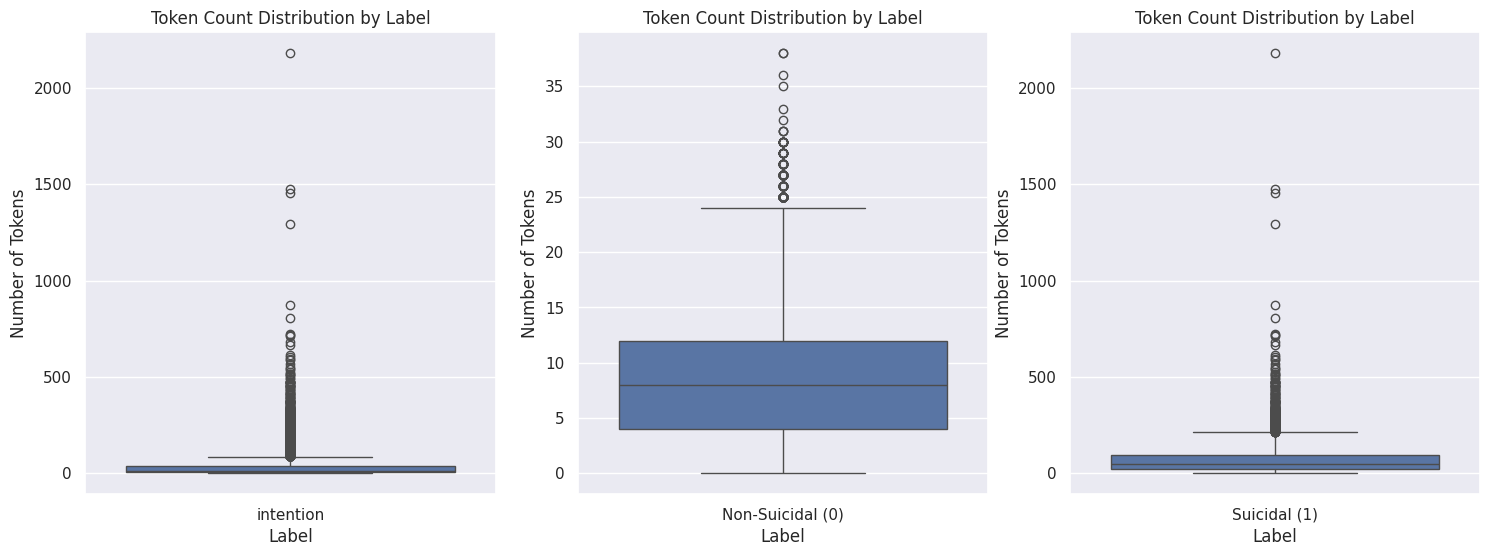

In [16]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
sns.boxplot(df["token_count"])
plt.title('Token Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Number of Tokens')
plt.xticks([0], ['intention'])

plt.subplot(1,3,2)
sns.boxplot(x='intention', y='token_count', data=df[df['intention'] == 0])
plt.title('Token Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Number of Tokens')
plt.xticks([0], ['Non-Suicidal (0)'])

plt.subplot(1,3,3)
sns.boxplot(x='intention', y='token_count', data=df[df['intention'] == 1])
plt.title('Token Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Number of Tokens')
plt.xticks([0], ['Suicidal (1)'])
plt.show()

In [17]:
df['token_count'].describe()

count    9119.000000
mean       38.054063
std        73.056092
min         0.000000
25%         6.000000
50%        12.000000
75%        38.000000
max      2179.000000
Name: token_count, dtype: float64

In [18]:
df.groupby('intention')['token_count'].describe()

,count,mean,std,min,25%,50%,75%,max
intention,,,,,,,,
0,5121.0,9.127514,6.561067,0.0,4.0,8.0,12.0,38.0
1,3998.0,75.105803,98.361058,0.0,20.0,47.0,97.0,2179.0


<a id='questions0'></a>

<h1 style = "color:red;font-size:30px" dir = "ltr"> <b>
    Questions
</b> </h1>

<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    Briefly explain the advantages and disadvantages of converting the text to lowercase format and tell why we do this in the processing?
</b> </h1>

- **Advantages**:

  - **Case-insensitivity**: Many languages have different word meanings depending on capitalization (e.g., "Help" vs. "help"). Lowercase conversion ensures the model focuses on the word itself, not its case variation.

  - **Reduces vocabulary size**: The model only needs to learn word representations for lowercase characters, reducing the number of unique words it needs to handle.

  - **Simpler processing**: Many Natural Language Processing (NLP) techniques work better with lowercase text, making the overall process more efficient.

- **Disadvantages**:

  - **Loss of information**: In some cases, capitalization can be semantically important. For example, acronyms (like "USA") or proper nouns (like "Paris") might lose meaning when converted.

Despite the potential loss of information, the advantages of case-insensitivity, reduced vocabulary size, and simpler processing often outweigh the disadvantages. In sentiment analysis tasks like detecting suicidal thoughts, the meaning conveyed by the message is generally more important than capitalization specifics.

Here, focusing on the overall sentiment expressed in the tweet is crucial. By converting everything to lowercase, we can ensure the model is primarily looking for keywords and patterns that indicate suicidal intent, regardless of how those words are capitalized in the original tweet.

<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    Research the elimination of numbers in the above processes and name the advantages and disadvantages of this process.
</b> </h1>

- **Advantages**:

  - **Reduced vocabulary size**: Numbers can significantly increase the vocabulary size, especially for social media data where dates, prices, or other numerical mentions are frequent. Removing them reduces the number of unique tokens the model needs to learn representations for.

  - **Focus on sentiment**: In sentiment analysis for detecting suicidal ideation, the specific numbers mentioned might not be as relevant as the overall sentiment conveyed. Numbers themselves don't carry emotional weight. For example, "feeling so down at 3 am" might be more indicative of negativity than "feeling down on a Tuesday."

  - **Normalization**: Numbers can have different formats and scales depending on the context. Removing them eliminates the need for complex normalization techniques to account for varying numerical formats.

- **Disadvantages**:

  - **Loss of information**: In some cases, numbers can be crucial for understanding the context. For example, "I have taken 10 pills" carries a much stronger suicidal intent than "I have taken some pills." Removing numbers entirely might lead to misinterpretations.

- **Dates and times**: Dates and times can be relevant for identifying patterns of suicidal ideation.

<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    We have the ability to use hashtags in the Twitter social network. Explain why we did not remove these expressions and what effect does keeping them have on the performance of the model?
</b> </h1>

- **Importance of Hashtags**:

  - **Thematic Indicators**: Hashtags often function as thematic indicators, condensing the message's core concept. Hashtags like #SuicidePrevention or #FeelingHopeless can directly convey suicidal thoughts or emotional states relevant to the task.

  - **Community and Support**: Hashtags can connect users to relevant communities or resources. For example, #MentalHealthMatters or #CrisisTextLine can indicate the user is seeking help or expressing struggles related to mental health.

  - **Emerging Trends**: Hashtags can reveal emerging trends in suicidal ideation. Tracking specific hashtags like #BlueMonday or #FinalsWeek can help identify periods with potentially higher risks.

- **Impact on Model Performance**:

  - **Improved Accuracy**: Keeping hashtags can provide the model with valuable keywords directly related to suicidal intent. This can lead to improved accuracy in identifying suicidal tweets.

  - **Contextual Understanding**: Hashtags can offer context to the overall sentiment. For instance, a tweet saying "life is pointless #sarcasm" might have a different meaning than "life is pointless #feels" due to the contrasting hashtags.

<a id='part1'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Part I: Feature Vectors
</b> </h1>

![word2vec](https://semaphoreci.com/wp-content/uploads/2023/06/word2vec.jpg)

In [19]:
# print available word2vec models
print("\n".join(api.info()['models'].keys()))

W2V_PATH = None # Path to W2V if downloaded
if W2V_PATH is not None and os.path.exists(W2V_PATH):
    print("Loading Word2Vec model...")
    w2v_model = gensim.models.KeyedVectors.load(W2V_PATH, mmap='r')
    print("Word2Vec model is loaded.")
else:
    print("Downloading Word2Vec model...")
    w2v_model = api.load("word2vec-google-news-300")
    print("Word2vec model is downloaded.")
    if W2V_PATH is not None:
        print("\nSaving Word2Vec model...")
        w2v_model.save(W2V_PATH)
        print("Word2Vec model is saved.")

EMBEDDING_VECTOR_DIM = w2v_model.vector_size

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2vec model is downloaded.


In [20]:
class Twitter(Dataset):
    def __init__(self, dataframe: pd.DataFrame, w2v_model: gensim.models.KeyedVectors, sequence_len: int):
        self.dataframe = dataframe
        self.w2v_model = w2v_model
        self.max_sequence_len = sequence_len
        self.vector_size = w2v_model.vector_size

        self.df_token_col = "tokens"

        self._proc_dataset()

        self.len = len(self.dataframe)

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        return self.dataframe.iloc[idx]["vector"], self.dataframe.iloc[idx]["intention"]

    def get_vector_size(self):
        return self.vector_size

    def _proc_dataset(self):
        # Preprocess and return tokens list
        self.dataframe[self.df_token_col] = self.dataframe["tweet"].map(preprocess_data)

        # delete samples with empty tokens
        lwz = len(self.dataframe)
        self.dataframe = self.dataframe[self.dataframe[self.df_token_col].map(len) > 0]
        self.dataframe.reset_index(drop=True, inplace=True)
        print(f"Deleted 0-Len Samples: {lwz - len(self.dataframe)}")

        # Add padding
        self.dataframe[self.df_token_col] = self.dataframe[self.df_token_col].map(self._pad)

        # Get embedding's vectors
        self.dataframe["vector"] = self.dataframe[self.df_token_col].map(self._get_word_vectors)

    def _get_word_vectors(self, tokens: list) -> torch.tensor:
        vectors = []
        for token in tokens:
            if token in self.w2v_model:
                vectors.append(self.w2v_model[token])
            else:
                vectors.append(np.zeros(self.vector_size))
        return torch.tensor(vectors, dtype=torch.float32)

    def _pad(self, tokens: list):
        if len(tokens) < self.max_sequence_len:
            tokens.extend([''] * (self.max_sequence_len - len(tokens)))
        return tokens[:self.max_sequence_len]

    def seq_report(self):
        length_all = self.dataframe[self.df_token_col].map(len).tolist()
        max_length = np.max(length_all)
        print(f"Sequence Length Report")
        print(f":::::MAX  LENGTH:::[{max_length:^5}]")
        print(f":::::MIN  LENGTH:::[{np.min(length_all):^5}]")
        print(f":::::MEAN LENGTH:::[{np.mean(length_all):^5}]")

        all_tokens = set()
        for token_set in self.dataframe[self.df_token_col].tolist():
            all_tokens = all_tokens.union(set(token_set))
        unique_tokens_count = len(all_tokens)
        valid_tokens = sum(1 if token in self.w2v_model else 0 for token in all_tokens)
        print("Sequence Tokenization Report")
        print(f":::::All Unique Tokens:::[{unique_tokens_count:^6}]")
        print(f":::::All Valid Tokens:::[{valid_tokens:^6}]")
        print(f":::::Valid Tokens:::[{round(100*valid_tokens/unique_tokens_count, 2):^5}%]")

    @staticmethod
    def _to_tensor(tokens: list):
        return torch.tensor(tokens, dtype=torch.float32)

In [21]:
warnings.filterwarnings("ignore")
dataset = Twitter(df, w2v_model, SEQUENCE_LEN)
dataset.seq_report()

Deleted 0-Len Samples: 29
Sequence Length Report
:::::MAX  LENGTH:::[ 64  ]
:::::MIN  LENGTH:::[ 64  ]
:::::MEAN LENGTH:::[64.0 ]
Sequence Tokenization Report
:::::All Unique Tokens:::[15463 ]
:::::All Valid Tokens:::[10304 ]
:::::Valid Tokens:::[66.64%]


<a id='questions1'></a>

<h1 style = "color:red;font-size:30px" dir = "ltr"> <b>
    Questions
</b> </h1>

<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    Explain what are the methods of dealing with non-existent words in the mentioned dictionary and name the advantages and disadvantages of each.
</b> </h1>

some methods for dealing with non-existent words (out-of-vocabulary words, OOV) in the Word2Vec dictionary:

1. **gnoring OOV words**:

    - **Advantages**: Simple to implement, reduces processing time.
  
    - **Disadvantages**: May lead to information loss, especially if OOV words are frequent or carry significant meaning. The model would completely disregard them.

2. Replacing OOV words with a special token (e.g., "UNK" for unknown):

    - **Advantages**: Prevents information loss entirely. The model acknowledges the presence of an unknown word.
  
    - **Disadvantages**: The special token might not capture any semantic meaning, potentially reducing the model's ability to understand the sentence.

3. Averaging word embeddings of neighboring words:

    - **Advantages**: Captures some context by considering surrounding words.
  
    - **Disadvantages**: Assumes some similarity between neighboring words, which might not always be true. Can be computationally expensive for long sentences.

4. Random embedding:

    - **Advantages**: Provides some representation for the OOV word, preventing the model from completely ignoring it.
  
    - **Disadvantages**: Random embedding might not be semantically meaningful and could introduce noise into the model.

5. Subword information (if available in the Word2Vec model):

    - **Advantages**: Leverages subword information (prefixes, suffixes) to create a more meaningful representation for the OOV word, especially for morphologically rich languages.
  
    - **Disadvantages**: Requires a Word2Vec model trained specifically with subword information, which might not always be available.

<a id='part2'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Part II: Classification using a CNN network
</b> </h1>

![CNN](https://editor.analyticsvidhya.com/uploads/183560_qcMBDPuKpDvICcdd.png)


![CNN](https://editor.analyticsvidhya.com/uploads/556091_ciDgQEjViWLnCbmX-EeSrA.gif)


In [22]:
# Split the dataset into train and test sets
warnings.filterwarnings("ignore")
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

# Create Twitter dataset for training and validation
train_dataset = Twitter(train_df, w2v_model, SEQUENCE_LEN)
valid_dataset = Twitter(valid_df, w2v_model, SEQUENCE_LEN)

print(f"Train dataset length: {len(train_dataset)}")
print(f"Valid dataset length: {len(valid_dataset)}")

Deleted 0-Len Samples: 21
Deleted 0-Len Samples: 8
Train dataset length: 7274
Valid dataset length: 1816


In [23]:
@torch.no_grad()
def model_eval(model, loader, loss_function, device='cpu'):
    """Returns test_loss, test_acc"""
    test_loss = 0.0
    test_acc = 0.0
    total = 0
    correct = 0

    model = model.to(device)
    itr = tqdm(loader, total=len(loader), leave=False)

    for inputs, labels in itr:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    test_acc = 100 * correct / total
    return test_loss / len(loader), test_acc

In [24]:
def train_model(
        model,
        batch_size,
        loss_function,
        optimizer,
        epochs,
        train_set,
        valid_set,
        device='cpu',
):

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False)

    model.to(device)

    train_losses = []
    train_accs = []

    valid_losses = []
    valid_accs = []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        epoch_acc = 0
        total = 0
        correct = 0
        itr = tqdm(train_loader, total=len(train_loader), leave=False)

        for inputs, labels in itr:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss / len(train_loader))
        train_accs.append(epoch_acc)

        model.eval()
        valid_loss, valid_acc = model_eval(
            model=model,
            loader=valid_loader,
            loss_function=loss_function,
            device=device
        )

        valid_losses.append(valid_loss)
        valid_accs.append(valid_acc)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.4f}, Valid Loss: {valid_losses[-1]:.4f}, Valid Acc: {valid_accs[-1]:.4f}')

    history = {
      "train_loss": train_losses,
      "train_acc": train_accs,
      "valid_loss": valid_losses,
      "valid_acc": valid_accs,
    }
    return history

In [25]:
def trend_plot_helper(pobj):
    plt.figure(figsize=(5*len(pobj), 5))
    for idx, (titler, plots) in enumerate(pobj.items(), start=1):
        plt.subplot(1, len(pobj), idx)
        for label, trend in plots:
            plt.plot(range(1, len(trend)+1), trend, label=label)
        yt, xt = titler.split(' - ')
        plt.xlabel(xt)
        plt.ylabel(yt)
        plt.legend()

In [26]:
@torch.no_grad()
def generate_confusion_matrix(model, dataset, device='cpu'):
    model = model.to(device)
    loader = DataLoader(dataset, batch_size=32, shuffle=False)
    itr = tqdm(loader, leave=False, desc="Generate data")

    all_labels = []
    all_predictions = []

    for inputs, labels in itr:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

    cm = metrics.confusion_matrix(y_true=all_labels, y_pred=all_predictions)

    plt.figure(figsize=(10,10))
    sns.heatmap(cm, cmap='Blues', annot=True, cbar=False, fmt=".0f",)
    plt.xlabel('Predicted Label', labelpad=20)
    plt.ylabel('True Label', labelpad=20)
    plt.title('Confusion Matrix', fontsize=30)

    recall = metrics.recall_score(y_true=all_labels, y_pred=all_predictions, average='macro')
    f1 = metrics.f1_score(y_true=all_labels, y_pred=all_predictions, average='macro')
    precision = metrics.precision_score(y_true=all_labels, y_pred=all_predictions, average='macro')
    report = metrics.classification_report(y_true=all_labels, y_pred=all_predictions)

    return {'recall': recall, 'f1': f1, 'precision': precision, 'report': report}


In [38]:
class CNN(nn.Module):
    def __init__(self, embedding_dim, num_filters, sequence_len, kernel_size):
        super(CNN, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_filters = num_filters
        self.sequence_len = sequence_len
        self.kernel_size = kernel_size

        self.conv1 = nn.Conv1d(in_channels=sequence_len, out_channels=num_filters, kernel_size= self.kernel_size, stride= 1)
        self.conv2 = nn.Conv1d(in_channels=num_filters, out_channels=128, kernel_size= self.kernel_size, stride= 1)
        self.max_pool = nn.MaxPool1d(kernel_size = self.kernel_size)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.flatten_dim = self._get_flatten_dim()
        self.fc1 = nn.Linear(self.flatten_dim, 128)
        self.fc2 = nn.Linear(128, 2)

    def _get_flatten_dim(self):
        input = torch.zeros(self.num_filters, self.sequence_len, self.embedding_dim)
        output = self.conv1(input)
        output = self.max_pool(output)
        output = self.conv2(output)
        output = self.max_pool(output)
        output = self.flatten(output)
        return output.size()[1]

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

Epoch 1/25, Train Loss: 0.4198, Train Acc: 82.2519, Valid Loss: 0.3502, Valid Acc: 85.1322


Epoch 2/25, Train Loss: 0.3625, Train Acc: 84.6027, Valid Loss: 0.3464, Valid Acc: 85.5176


Epoch 3/25, Train Loss: 0.3557, Train Acc: 84.7539, Valid Loss: 0.3392, Valid Acc: 85.9581


Epoch 4/25, Train Loss: 0.3528, Train Acc: 85.0564, Valid Loss: 0.3400, Valid Acc: 86.1233


Epoch 5/25, Train Loss: 0.3501, Train Acc: 84.8227, Valid Loss: 0.3393, Valid Acc: 86.2885


Epoch 6/25, Train Loss: 0.3488, Train Acc: 85.3863, Valid Loss: 0.3369, Valid Acc: 86.5088


Epoch 7/25, Train Loss: 0.3482, Train Acc: 85.0426, Valid Loss: 0.3469, Valid Acc: 85.4626


Epoch 8/25, Train Loss: 0.3451, Train Acc: 85.3313, Valid Loss: 0.3529, Valid Acc: 84.3612


Epoch 9/25, Train Loss: 0.3497, Train Acc: 85.0564, Valid Loss: 0.3399, Valid Acc: 85.7379


Epoch 10/25, Train Loss: 0.3475, Train Acc: 85.2213, Valid Loss: 0.3622, Valid Acc: 84.9670


Epoch 11/25, Train Loss: 0.3448, Train Acc: 85.1389, Valid Loss: 0.3312, Valid Acc: 86.7841


Epoch 12/25, Train Loss: 0.3414, Train Acc: 85.5375, Valid Loss: 0.3519, Valid Acc: 85.3524


Epoch 13/25, Train Loss: 0.3423, Train Acc: 85.6063, Valid Loss: 0.3375, Valid Acc: 85.9581


Epoch 14/25, Train Loss: 0.3403, Train Acc: 85.7162, Valid Loss: 0.3275, Valid Acc: 86.6740


Epoch 15/25, Train Loss: 0.3381, Train Acc: 85.8400, Valid Loss: 0.3274, Valid Acc: 86.6189


Epoch 16/25, Train Loss: 0.3383, Train Acc: 85.8262, Valid Loss: 0.3284, Valid Acc: 86.6740


Epoch 17/25, Train Loss: 0.3355, Train Acc: 86.0874, Valid Loss: 0.3295, Valid Acc: 86.4537


Epoch 18/25, Train Loss: 0.3382, Train Acc: 85.5788, Valid Loss: 0.3225, Valid Acc: 87.0044


Epoch 19/25, Train Loss: 0.3331, Train Acc: 86.1424, Valid Loss: 0.3418, Valid Acc: 85.3524


Epoch 20/25, Train Loss: 0.3329, Train Acc: 86.1562, Valid Loss: 0.3231, Valid Acc: 87.2247


Epoch 21/25, Train Loss: 0.3290, Train Acc: 86.1562, Valid Loss: 0.3349, Valid Acc: 86.0132


Epoch 22/25, Train Loss: 0.3263, Train Acc: 86.3624, Valid Loss: 0.3211, Valid Acc: 86.8943


Epoch 23/25, Train Loss: 0.3255, Train Acc: 86.5411, Valid Loss: 0.3155, Valid Acc: 87.3348


Epoch 24/25, Train Loss: 0.3185, Train Acc: 86.6511, Valid Loss: 0.3257, Valid Acc: 86.1784


Epoch 25/25, Train Loss: 0.3188, Train Acc: 86.5411, Valid Loss: 0.3191, Valid Acc: 86.5639


Recall:    0.850
F1:        0.858
Precision: 0.895
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1011
           1       0.98      0.71      0.82       805

    accuracy                           0.87      1816
   macro avg       0.89      0.85      0.86      1816
weighted avg       0.89      0.87      0.86      1816



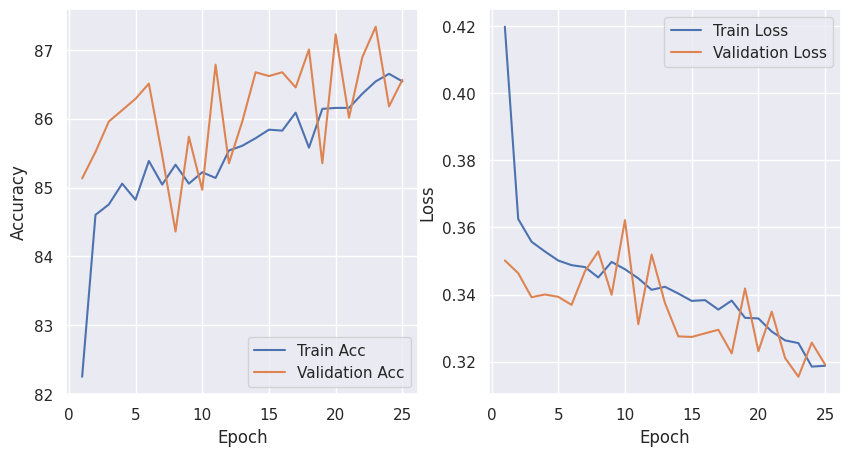

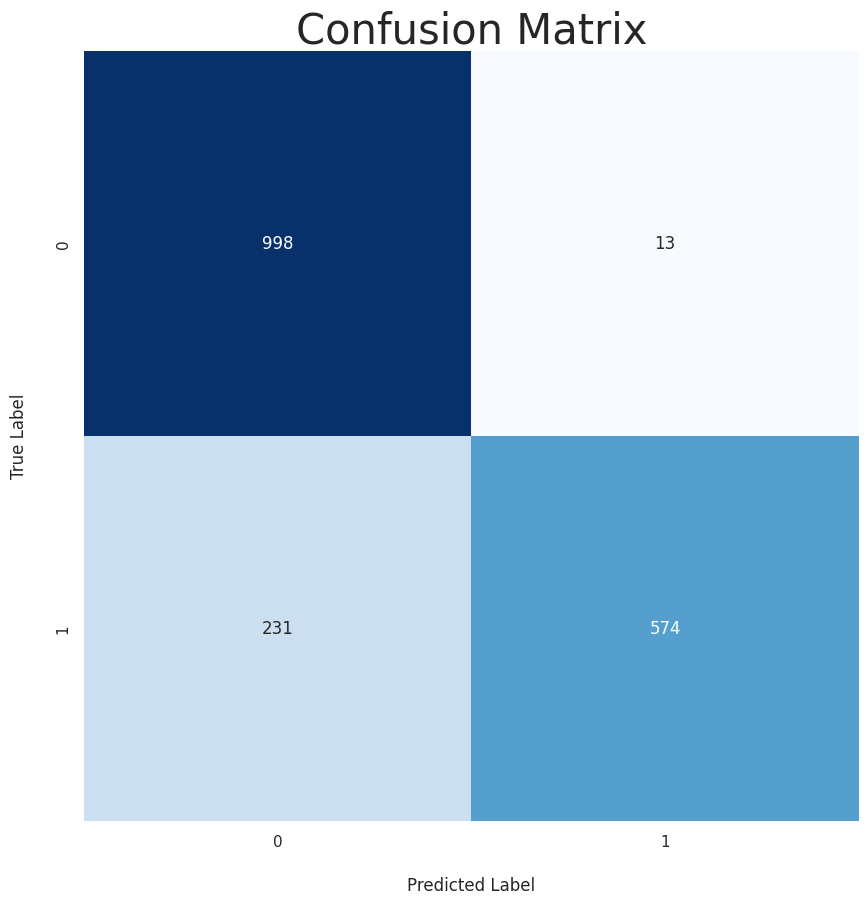

In [39]:
EMBEDDING_VECTOR_DIM = 300
BATCH_SIZE = 64
LEARNING_RATE = 4e-4
WEIGHT_DECAY = 1e-2
EPOCHS = 25
SEQUENCE_LEN = 64
CNN_FILTERS = 64
KERNEL_SIZE = 3

cnn_model = CNN(embedding_dim=EMBEDDING_VECTOR_DIM, num_filters=CNN_FILTERS, sequence_len=SEQUENCE_LEN, kernel_size= KERNEL_SIZE)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

cnn_model_train_history = train_model(
    model=cnn_model,
    batch_size=BATCH_SIZE,
    loss_function=loss_function,
    optimizer=optimizer,
    epochs=EPOCHS,
    train_set=train_dataset,
    valid_set=valid_dataset,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

trend_plot_helper(
    {
        "Accuracy - Epoch": [
            ("Train Acc", cnn_model_train_history["train_acc"]),
            ("Validation Acc", cnn_model_train_history["valid_acc"]),
        ],
        "Loss - Epoch": [
            ("Train Loss", cnn_model_train_history["train_loss"]),
            ("Validation Loss", cnn_model_train_history["valid_loss"])
        ]
    }
)

cnn_model_report = generate_confusion_matrix(
    model=cnn_model,
    dataset=valid_dataset,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

print(f"Recall:    {cnn_model_report['recall']:.3f}")
print(f"F1:        {cnn_model_report['f1']:.3f}")
print(f"Precision: {cnn_model_report['precision']:.3f}")
print(cnn_model_report['report'])

<a id='questions2'></a>

<h1 style = "color:red;font-size:30px" dir = "ltr"> <b>
    Questions
</b> </h1>

<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    Briefly explain how the Adam optimizer works and how it differs from the SGD optimizer.
</b> </h1>

- **SGD (Stochastic Gradient Descent)**:

  - SGD updates the weights of the model based on the current gradient of the loss function. This means it takes a small step in the direction that minimizes the loss.

  - It uses a single learning rate for all weights, which can be challenging to tune. A high learning rate might cause the model to jump around the minimum point instead of converging smoothly, while a low learning rate might lead to slow training.

- **Adam (Adaptive Moment Estimation)**:

  - Adam builds on SGD by addressing its learning rate issues. It maintains two estimates for each weight:

  - A moving average of the gradients (similar to momentum in SGD) to track the overall direction for weight updates.
  
  - A moving average of the squared gradients to adapt the learning rate for each weight individually.
  
  - Adam uses these estimates to adjust the learning rate for each weight during each update. This allows for faster convergence and reduces sensitivity to a single, global learning rate.

- **Differences**:

  - **Learning Rate Adaptation**: SGD has a single learning rate for all weights, while Adam adapts the learning rate for each weight individually.
  
  - **Momentum**: Both use momentum to improve convergence, but Adam incorporates it into its adaptive learning rate calculations.

  - **Convergence Speed**: Adam often converges faster and is more stable compared to SGD due to the adaptive learning rates.

<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    Use the Cross Entropy cost function. Also, tell the reason for using this cost function according to the nature of the problem.
</b> </h1>

The Cross Entropy loss is calculated using a logarithmic function to penalize larger differences between the probabilities. Here's a simplified formula for binary classification:

```
Loss = - (y * log(p) + (1-y) * log(1-p))
```

- y represents the actual class label (0 or 1)

- p represents the predicted probability of the positive class (e.g., suicidal)

The loss increases as the predicted probability p diverges from the actual class label y. For a perfectly classified example (predicted probability of 1 for a suicidal tweet), the loss becomes zero.

In this scenario, the Cross Entropy cost function is a suitable choice for several reasons:

1. **Binary Classification**: The problem involves classifying tweets into two categories: suicidal (1) or non-suicidal (0). Cross Entropy is specifically designed for binary classification tasks.

2. **Well-behaved Cost Function**:  Cross Entropy provides a smooth and well-behaved cost function for training neural networks with softmax output (used for probability distribution). This allows the model to learn effectively by providing clear gradients for weight updates.

3. **Penalizing Incorrect Probabilities**:  It penalizes the model for predicting probabilities far from the actual class. In this case, the model is penalized for assigning high probabilities to non-suicidal tweets when they are actually suicidal (and vice versa). This encourages the model to learn accurate class probabilities for each tweet.

4. ** Interpretable**: The loss relates to the KL Divergence, which measures the difference between distributions, making it easier to understand model performance.


<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    Now divide the data into two parts, training and testing. Report the ratio of this division and why you use this ratio.
</b> </h1>

A commonly used split ratio for training and testing data is 80% for training and 20% for testing. This is a good starting point for many machine learning tasks and offers several advantages:

- **Learning from Examples**: The training data (80%) allows the model to learn the relationships between the text features (words in tweets) and the corresponding labels (suicidal or non-suicidal).

- **Generalizability Evaluation**: The testing data (20%) helps assess how well the trained model performs on unseen tweets. This prevents the model from simply memorizing the training examples and ensures it can generalize to new data.

- **Balancing Extremes**: An 80/20 split provides a balance between having enough data for training and enough data for testing. It avoids situations where the model is either over-exposed to the training data or doesn't have enough information to learn effectively.

<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    What is the effect of kernel size in convolution layers and how is it effective in extracting input features? What does it mean to be more or less?
</b> </h1>

The kernel size in convolutional layers plays a crucial role in extracting features from input data, particularly in image and text classification tasks.

- **Kernel Size and Feature Extraction**:

  - A kernel, also known as a filter, is a small matrix that slides across the input data (image or text sequence) during the convolution operation.

  - The size of the kernel determines the area of the input it considers at a time.

  - As the kernel slides, it performs element-wise multiplication with the underlying input data, capturing specific patterns within that local region.

- **Impact of Kernel Size**:

  - **Smaller Kernel Size (3x3, 5x5)**:

    - Focuses on extracting low-level features like edges, lines, and local patterns in images or n-grams (sequences of n words) in text.

    - Can be effective for capturing basic building blocks of higher-level features.

    - Often used in the initial layers of a convolutional neural network (CNN) to learn these fundamental aspects of the data.

  - **Larger Kernel Size (7x7, or even up to 11x11)**:

    - Can capture more complex features by considering a larger area of the input data.

    - In images, this might involve identifying shapes, object parts, or even small objects themselves.

    - In text, it could capture phrases or short sentences within a tweet.

    - May be more suitable for later layers in a CNN, where the model builds upon the low-level features to identify more intricate patterns.

<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    In your opinion, why didn't we reduce the convolution output and did this reduction through Feed Forward layers and what advantages can this layer have over alternative methods? Investigate the reason for this and state the results.
</b> </h1>

Reasons for Not Reducing Convolution Output Explicitly:

  - **Preserving Spatial Information**: Convolution layers inherently capture spatial relationships between features in the input data (images or text sequences). Reducing the dimensionality before FC layers might discard valuable spatial information, particularly in the early stages of a CNN.

  - **Learning Feature Maps**: Convolutional layers learn feature maps that represent different aspects of the input. Maintaining the full dimensionality allows the model to capture a richer set of features before performing any reduction.

  - **Flexibility for FC Layers**: FC layers are highly flexible and can be used for dimensionality reduction later in the network architecture. This allows for more control over the final feature representation before classification.

Advantages of FC Layers for Dimensionality Reduction:

  - **Learned Reduction**: FC layers can learn how to best reduce the dimensionality of the features based on the specific task. This learned reduction might be more effective than a pre-defined approach like pooling layers (e.g., max pooling, average pooling).

  - **Non-linear Activation**: FC layers can be combined with non-linear activation functions (e.g., ReLU) before reduction. This allows the model to learn more complex feature representations that might not be captured by simple pooling operations.

  - **Adaptability**: FC layers offer greater control over the final feature representation. You can experiment with different numbers of neurons in the FC layer to achieve the desired level of dimensionality reduction while maintaining good performance.

<a id='part3'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Part III: Effect of context window size
</b> </h1>

In [40]:
EMBEDDING_VECTOR_DIM = 300
BATCH_SIZE = 64
LEARNING_RATE = 4e-4
WEIGHT_DECAY = 1e-2
EPOCHS = 25
SEQUENCE_LEN = 196
CNN_FILTERS = 64
KERNEL_SIZE = 3

train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)
train_dataset = Twitter(train_df, w2v_model, SEQUENCE_LEN)
valid_dataset = Twitter(valid_df, w2v_model, SEQUENCE_LEN)

print(f"Train dataset length: {len(train_dataset)}")
print(f"Valid dataset length: {len(valid_dataset)}")

Deleted 0-Len Samples: 21
Deleted 0-Len Samples: 8
Train dataset length: 7274
Valid dataset length: 1816


Epoch 1/25, Train Loss: 0.4123, Train Acc: 82.9667, Valid Loss: 0.3536, Valid Acc: 85.4626


Epoch 2/25, Train Loss: 0.3601, Train Acc: 84.3415, Valid Loss: 0.3450, Valid Acc: 85.6828


Epoch 3/25, Train Loss: 0.3555, Train Acc: 84.7814, Valid Loss: 0.3494, Valid Acc: 85.0220


Epoch 4/25, Train Loss: 0.3521, Train Acc: 84.8089, Valid Loss: 0.3396, Valid Acc: 85.9581


Epoch 5/25, Train Loss: 0.3500, Train Acc: 85.0701, Valid Loss: 0.3374, Valid Acc: 86.2885


Epoch 6/25, Train Loss: 0.3530, Train Acc: 85.0289, Valid Loss: 0.3444, Valid Acc: 85.4075


Epoch 7/25, Train Loss: 0.3456, Train Acc: 85.3726, Valid Loss: 0.3333, Valid Acc: 86.3987


Epoch 8/25, Train Loss: 0.3476, Train Acc: 85.2626, Valid Loss: 0.3364, Valid Acc: 86.6740


Epoch 9/25, Train Loss: 0.3445, Train Acc: 85.2488, Valid Loss: 0.3306, Valid Acc: 86.1784


Epoch 10/25, Train Loss: 0.3460, Train Acc: 85.2488, Valid Loss: 0.3363, Valid Acc: 86.0683


Epoch 11/25, Train Loss: 0.3394, Train Acc: 85.6613, Valid Loss: 0.3397, Valid Acc: 85.6278


Epoch 12/25, Train Loss: 0.3383, Train Acc: 85.9362, Valid Loss: 0.3373, Valid Acc: 85.2974


Epoch 13/25, Train Loss: 0.3376, Train Acc: 85.6613, Valid Loss: 0.3293, Valid Acc: 86.2335


Epoch 14/25, Train Loss: 0.3321, Train Acc: 86.1012, Valid Loss: 0.3233, Valid Acc: 87.0044


Epoch 15/25, Train Loss: 0.3266, Train Acc: 86.3486, Valid Loss: 0.3211, Valid Acc: 86.9493


Epoch 16/25, Train Loss: 0.3294, Train Acc: 85.9637, Valid Loss: 0.3161, Valid Acc: 87.0044


Epoch 17/25, Train Loss: 0.3183, Train Acc: 86.6373, Valid Loss: 0.3276, Valid Acc: 85.6278


Epoch 18/25, Train Loss: 0.3201, Train Acc: 86.2799, Valid Loss: 0.3160, Valid Acc: 87.2797


Epoch 19/25, Train Loss: 0.3109, Train Acc: 86.8161, Valid Loss: 0.3146, Valid Acc: 86.4537


Epoch 20/25, Train Loss: 0.3079, Train Acc: 86.9260, Valid Loss: 0.3041, Valid Acc: 87.1145


Epoch 21/25, Train Loss: 0.2995, Train Acc: 87.1048, Valid Loss: 0.3015, Valid Acc: 87.1696


Epoch 22/25, Train Loss: 0.2976, Train Acc: 87.2972, Valid Loss: 0.2945, Valid Acc: 87.9405


Epoch 23/25, Train Loss: 0.2949, Train Acc: 87.2972, Valid Loss: 0.2920, Valid Acc: 87.5000


Epoch 24/25, Train Loss: 0.2918, Train Acc: 87.5722, Valid Loss: 0.3005, Valid Acc: 87.4449


Epoch 25/25, Train Loss: 0.2905, Train Acc: 87.4347, Valid Loss: 0.3064, Valid Acc: 87.1145


Recall:    0.868
F1:        0.869
Precision: 0.870
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1011
           1       0.86      0.84      0.85       805

    accuracy                           0.87      1816
   macro avg       0.87      0.87      0.87      1816
weighted avg       0.87      0.87      0.87      1816



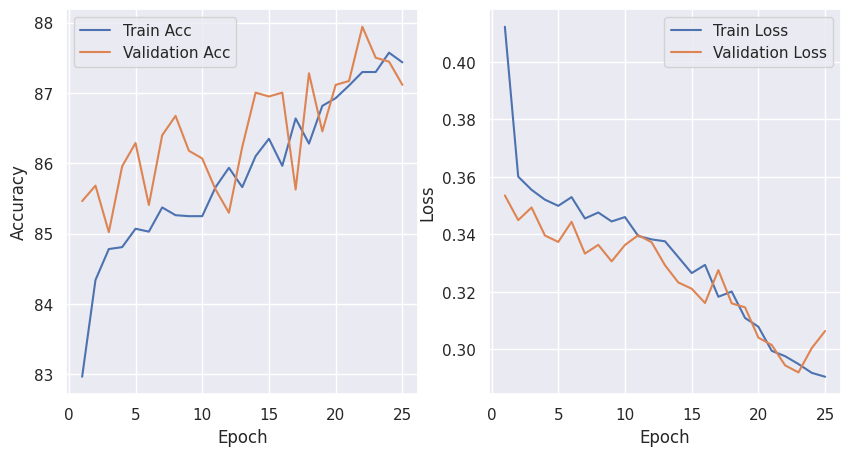

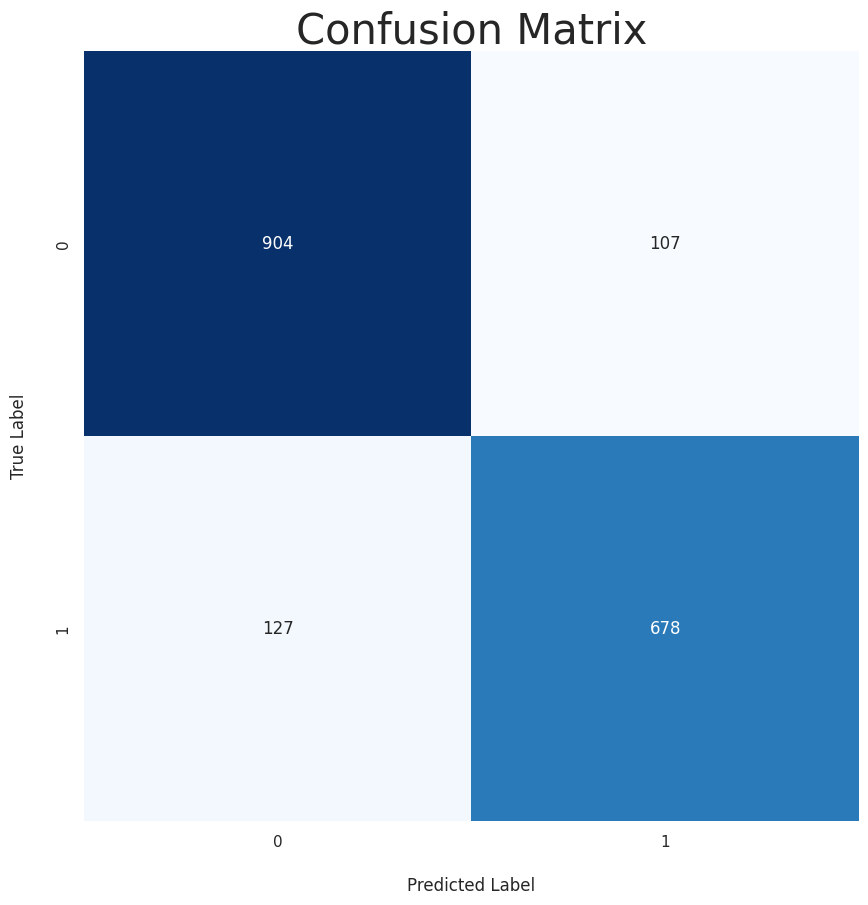

In [41]:
cnn_model = CNN(embedding_dim=EMBEDDING_VECTOR_DIM, num_filters=CNN_FILTERS, sequence_len=SEQUENCE_LEN, kernel_size= KERNEL_SIZE)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

cnn_model_train_history = train_model(
    model=cnn_model,
    batch_size=BATCH_SIZE,
    loss_function=loss_function,
    optimizer=optimizer,
    epochs=EPOCHS,
    train_set=train_dataset,
    valid_set=valid_dataset,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

trend_plot_helper(
    {
        "Accuracy - Epoch": [
            ("Train Acc", cnn_model_train_history["train_acc"]),
            ("Validation Acc", cnn_model_train_history["valid_acc"]),
        ],
        "Loss - Epoch": [
            ("Train Loss", cnn_model_train_history["train_loss"]),
            ("Validation Loss", cnn_model_train_history["valid_loss"])
        ]
    }
)

cnn_model_report = generate_confusion_matrix(
    model=cnn_model,
    dataset=valid_dataset,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

print(f"Recall:    {cnn_model_report['recall']:.3f}")
print(f"F1:        {cnn_model_report['f1']:.3f}")
print(f"Precision: {cnn_model_report['precision']:.3f}")
print(cnn_model_report['report'])


<a id='questions3'></a>

<h1 style = "color:red;font-size:30px" dir = "ltr"> <b>
    Questions
</b> </h1>

<h1 style = "color:green;font-size:20px" dir = "ltr"> <b>
    In your opinion, what are the advantages and disadvantages of increasing the size of the context window, so that it is larger than the entire dataset, in a convolutional neural network.
</b> </h1>

- **Advantages**:

  - **Capturing Long-Range Dependencies (Limited)**: In some tasks, like natural language processing (NLP) where sentences or paragraphs are the input, a larger context window might theoretically capture long-range dependencies between words that are further apart in the sequence. However, this benefit diminishes as the window size becomes significantly larger than the typical sequence length in the dataset.

  - **Reduced Need for Preprocessing**: If the context window is large enough to encompass the entire dataset, you might eliminate the need for preprocessing steps like data segmentation. However, this approach can be computationally expensive and impractical for most real-world datasets.

- **Disadvantages**:

  - **Increased Computational Cost**: Larger context windows require processing more data during convolution, leading to higher memory usage and longer training times. This can become a significant bottleneck, especially for large datasets or limited computational resources.

  - **Vanishing Gradients**: In CNNs, gradients are used to update model weights during training. With very large context windows, gradients might vanish or explode, making it difficult for the model to learn effectively. Techniques like gradient clipping or specific weight initialization can help mitigate this issue, but it adds complexity to the training process.

  - **Reduced Model Generalizability**: A model trained with a context window larger than the dataset might struggle to generalize to unseen data with different sequence lengths. It might become overly reliant on specific patterns within the training data that may not be present in new data.

  - **Potential for Redundancy**: For most tasks, information relevant to a specific prediction is often localized within a reasonable window size. A very large context window might introduce a lot of irrelevant information that can hinder the model's ability to focus on the essential features.

:<a id='part4'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Part IV: Effect of regularization methods
</b> </h1>

In [31]:
class CNN(nn.Module):
    def __init__(self, embedding_dim, num_filters, sequence_len, kernel_size):
        super(CNN, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_filters = num_filters
        self.sequence_len = sequence_len
        self.kernel_size = kernel_size

        self.conv1 = nn.Conv1d(in_channels = sequence_len, out_channels=num_filters, kernel_size= self.kernel_size, stride= 1)
        self.conv2 = nn.Conv1d(in_channels=num_filters, out_channels=128, kernel_size= self.kernel_size, stride= 1)
        self.max_pool = nn.MaxPool1d(kernel_size = self.kernel_size)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm1d(num_filters)
        self.batch_norm2 = nn.BatchNorm1d(128)

        self.flatten_dim = self._get_flatten_dim()
        self.fc1 = nn.Linear(self.flatten_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 2)
        self.bn2 = nn.BatchNorm1d(2)

    def _get_flatten_dim(self):
        input = torch.zeros(self.num_filters, self.sequence_len, self.embedding_dim)
        output = self.conv1(input)
        output = self.batch_norm1(output)
        output = self.max_pool(output)
        output = self.conv2(output)
        output = self.batch_norm2(output)
        output = self.max_pool(output)
        output = self.flatten(output)
        return output.size()[1]

    def forward(self, x):
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.conv2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        return x

In [34]:
EMBEDDING_VECTOR_DIM = 300
BATCH_SIZE = 64
LEARNING_RATE = 4e-4
WEIGHT_DECAY = 1e-2
EPOCHS = 25
SEQUENCE_LEN = 64
CNN_FILTERS = 64
KERNEL_SIZE = 3

train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)
train_dataset = Twitter(train_df, w2v_model, SEQUENCE_LEN)
valid_dataset = Twitter(valid_df, w2v_model, SEQUENCE_LEN)

print(f"Train dataset length: {len(train_dataset)}")
print(f"Valid dataset length: {len(valid_dataset)}")

Deleted 0-Len Samples: 21
Deleted 0-Len Samples: 8
Train dataset length: 7274
Valid dataset length: 1816


Epoch 1/25, Train Loss: 0.3880, Train Acc: 83.5304, Valid Loss: 0.3565, Valid Acc: 85.3524


Epoch 2/25, Train Loss: 0.3390, Train Acc: 86.4311, Valid Loss: 0.3103, Valid Acc: 87.3348


Epoch 3/25, Train Loss: 0.3076, Train Acc: 88.2733, Valid Loss: 0.3057, Valid Acc: 87.0595


Epoch 4/25, Train Loss: 0.2774, Train Acc: 89.8818, Valid Loss: 0.2989, Valid Acc: 88.7665


Epoch 5/25, Train Loss: 0.2589, Train Acc: 91.3665, Valid Loss: 0.3396, Valid Acc: 87.0044


Epoch 6/25, Train Loss: 0.2403, Train Acc: 91.7652, Valid Loss: 0.2987, Valid Acc: 87.8304


Epoch 7/25, Train Loss: 0.2237, Train Acc: 92.6450, Valid Loss: 0.3006, Valid Acc: 87.0044


Epoch 8/25, Train Loss: 0.2167, Train Acc: 92.8375, Valid Loss: 0.2700, Valid Acc: 89.2621


Epoch 9/25, Train Loss: 0.2027, Train Acc: 93.7311, Valid Loss: 0.2843, Valid Acc: 87.9405


Epoch 10/25, Train Loss: 0.1963, Train Acc: 93.7998, Valid Loss: 0.2689, Valid Acc: 89.5925


Epoch 11/25, Train Loss: 0.1836, Train Acc: 94.2535, Valid Loss: 0.3004, Valid Acc: 87.7753


Epoch 12/25, Train Loss: 0.1767, Train Acc: 94.5697, Valid Loss: 0.2551, Valid Acc: 89.6476


Epoch 13/25, Train Loss: 0.1739, Train Acc: 94.7072, Valid Loss: 0.2850, Valid Acc: 88.4361


Epoch 14/25, Train Loss: 0.1657, Train Acc: 94.9684, Valid Loss: 0.2742, Valid Acc: 89.0969


Epoch 15/25, Train Loss: 0.1601, Train Acc: 95.0921, Valid Loss: 0.3453, Valid Acc: 84.3612


Epoch 16/25, Train Loss: 0.1565, Train Acc: 95.4358, Valid Loss: 0.2695, Valid Acc: 88.2159


Epoch 17/25, Train Loss: 0.1540, Train Acc: 95.3258, Valid Loss: 0.2776, Valid Acc: 88.9317


Epoch 18/25, Train Loss: 0.1525, Train Acc: 95.1196, Valid Loss: 0.2969, Valid Acc: 88.8216


Epoch 19/25, Train Loss: 0.1390, Train Acc: 95.9307, Valid Loss: 0.2638, Valid Acc: 89.4273


Epoch 20/25, Train Loss: 0.1436, Train Acc: 95.6970, Valid Loss: 0.3103, Valid Acc: 88.1057


Epoch 21/25, Train Loss: 0.1349, Train Acc: 95.9445, Valid Loss: 0.2615, Valid Acc: 89.7026


Epoch 22/25, Train Loss: 0.1325, Train Acc: 95.9582, Valid Loss: 0.2747, Valid Acc: 89.2070


Epoch 23/25, Train Loss: 0.1268, Train Acc: 96.5768, Valid Loss: 0.2751, Valid Acc: 89.3172


Epoch 24/25, Train Loss: 0.1210, Train Acc: 96.5494, Valid Loss: 0.2717, Valid Acc: 88.9317


Epoch 25/25, Train Loss: 0.1236, Train Acc: 96.2469, Valid Loss: 0.2909, Valid Acc: 88.6013


Recall:    0.877
F1:        0.882
Precision: 0.896
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1011
           1       0.94      0.80      0.86       805

    accuracy                           0.89      1816
   macro avg       0.90      0.88      0.88      1816
weighted avg       0.89      0.89      0.88      1816



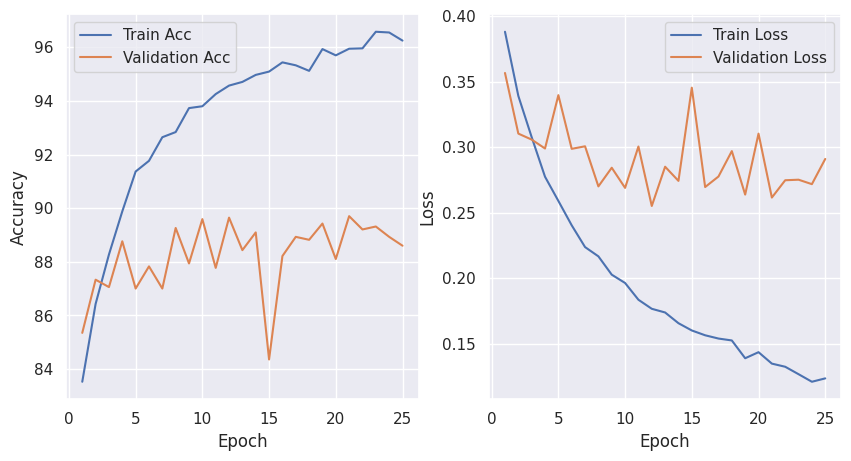

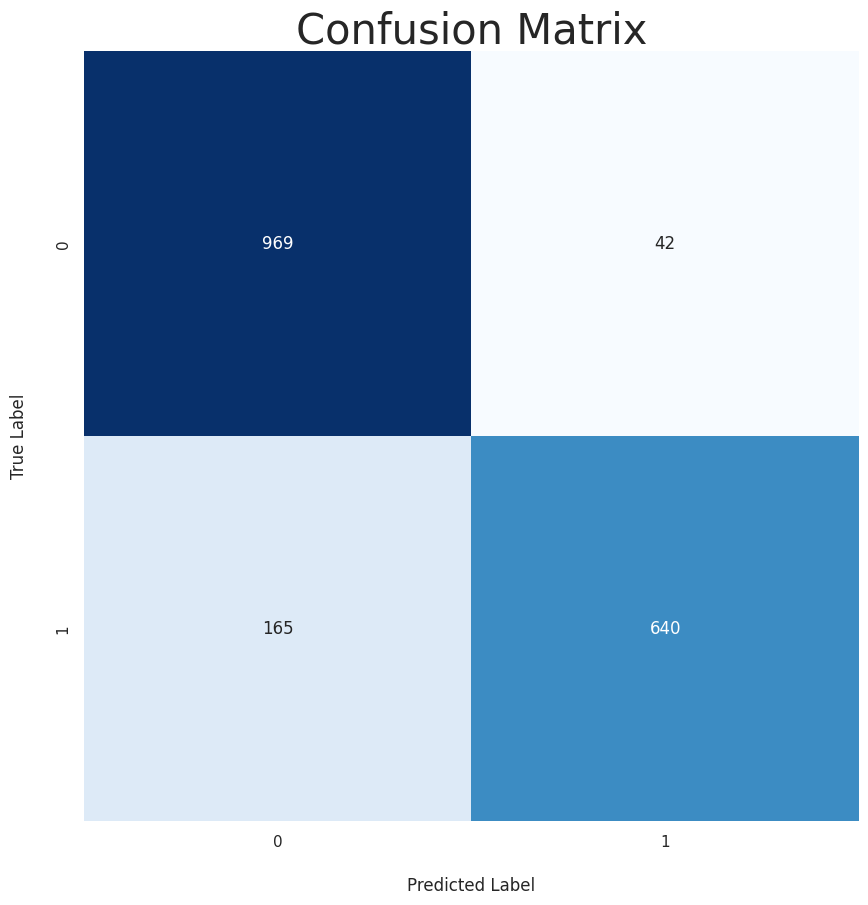

In [36]:
cnn_model = CNN(embedding_dim=EMBEDDING_VECTOR_DIM, num_filters=CNN_FILTERS, sequence_len=SEQUENCE_LEN, kernel_size= KERNEL_SIZE)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

cnn_model_train_history = train_model(
    model=cnn_model,
    batch_size=BATCH_SIZE,
    loss_function=loss_function,
    optimizer=optimizer,
    epochs=EPOCHS,
    train_set=train_dataset,
    valid_set=valid_dataset,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

trend_plot_helper(
    {
        "Accuracy - Epoch": [
            ("Train Acc", cnn_model_train_history["train_acc"]),
            ("Validation Acc", cnn_model_train_history["valid_acc"]),
        ],
        "Loss - Epoch": [
            ("Train Loss", cnn_model_train_history["train_loss"]),
            ("Validation Loss", cnn_model_train_history["valid_loss"])
        ]
    }
)

cnn_model_report = generate_confusion_matrix(
    model=cnn_model,
    dataset=valid_dataset,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

print(f"Recall:    {cnn_model_report['recall']:.3f}")
print(f"F1:        {cnn_model_report['f1']:.3f}")
print(f"Precision: {cnn_model_report['precision']:.3f}")
print(cnn_model_report['report'])


<a id='references'></a>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    References
</b> </h1>

https://theinformationlab.nl/2023/03/22/an-introduction-to-embeddings/

https://www.analyticsvidhya.com/blog/2021/07/word2vec-for-word-embeddings-a-beginners-guide/

https://pytorch.org/tutorials/beginner/basics/intro.html

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam,derived%20from%20adaptive%20moment%20estimation

https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/

https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/